#### Задание

При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: strategy {'best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin',
'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin'}, 
popsize (int), tol (float), mutation (range [0, 2]), recombination (range [0, 1]) и updating {‘immediate’, ‘deferred’}.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.

##### Допзадание

Найти множество параметров (strategy=..., ..., updating=...), которые требуют минимального количества итераций.

In [2]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

In [3]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
    
result = differential_evolution(ackley, bounds, seed=42, popsize=5)

result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 1073
     nit: 100
 success: True
       x: array([0., 0.])

In [4]:
strategy = {'best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin',
'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin'}
updating = {'immediate', 'deferred'}
popsize = np.arange(1, 10, 1)
tol = np.arange(0, 1.0, 0.2)
mutation = np.arange(0, 2.0, 0.3)
recombination = np.arange(0, 1.0, 0.2)

In [5]:
result_best = 1000
param_best = {}
error_list = {}
bounds = [(-10, 10), (-10, 10)]
a = np.array([0., 0.])

for strtg in strategy:
    for upd in updating:
        for pops in popsize:
            for tl in tol:
                for mut in mutation:
                    for recm in recombination:
#                        print ('Набор:', strtg, upd, pops, tl, mut, recm)
                        try:
                            result = differential_evolution(ackley, bounds, seed=42, maxiter=100, strategy=strtg , updating=upd , popsize=pops , tol=tl , mutation=mut , recombination=recm)
                        except ValueError:
                            error_list = {'strategy': strtg, 'updating': upd, 'popsize': pops, 'tol': tl, 'mutation': mut, 'recombination': recm}

                        if all(result['x'] == a):
                            if result['nit'] < result_best:
                                result_best = result['nit']
                                param_best = {'strategy': strtg, 'updating': upd, 'popsize': pops, 'tol': tl, 'mutation': mut, 'recombination': recm}
print(result_best, param_best)

36 {'strategy': 'best1bin', 'updating': 'immediate', 'popsize': 7, 'tol': 0.0, 'mutation': 0.3, 'recombination': 0.8}


In [24]:
strategy_data = {strtg: differential_evolution(ackley, bounds, seed=42, strategy=strtg)['nit'] for strtg in strategy}

updating_data = {upd: differential_evolution(ackley, bounds, seed=42, updating=upd)['nit'] for upd in updating}

popsize_data = {pops: differential_evolution(ackley, bounds, seed=42, popsize=pops)['nit'] for pops in popsize}

tol_data = {tl: differential_evolution(ackley, bounds, seed=42, tol=tl)['nit'] for tl in tol}

mutation_data = {mut: differential_evolution(ackley, bounds, seed=42, mutation=mut)['nit'] for mut in mutation}

recombination_data = {mut: differential_evolution(ackley, bounds, seed=42, recombination=recomb)['nit'] for recomb in recombination}

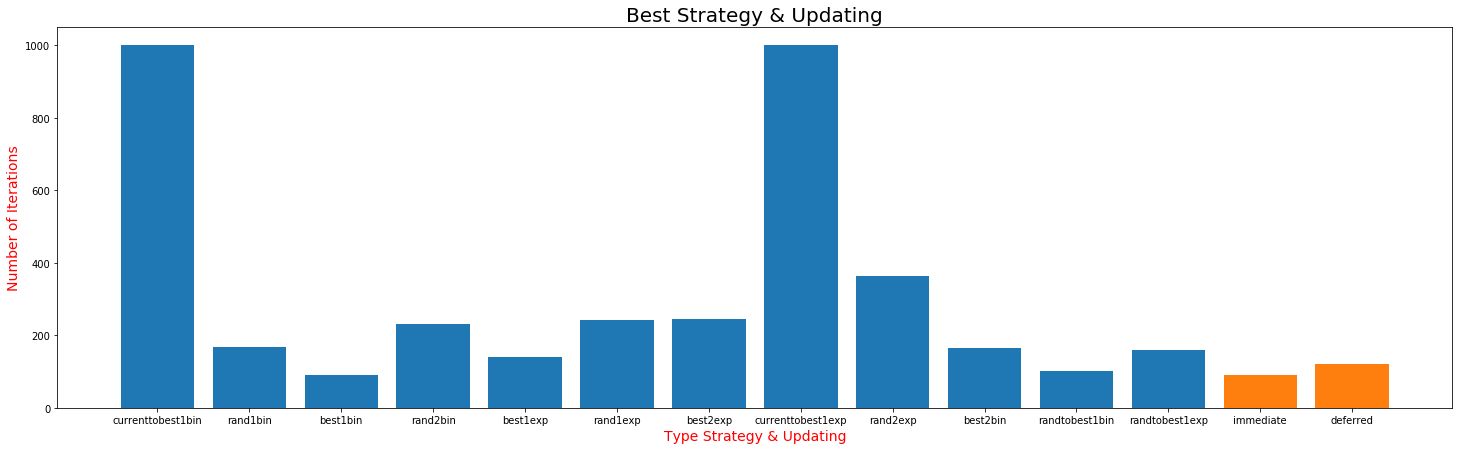

In [13]:
plt.figure(figsize=(25,7))

type_str = list(strategy_data.keys())
counts = list(strategy_data.values())

plt.bar(type_str, counts)
plt.title("Best Strategy & Updating", fontsize=20)
plt.xlabel("Type Strategy & Updating", color="red", fontsize=14)
plt.ylabel("Number of Iterations", color="red", fontsize=14)

type_upd = list(updating_data.keys())
counts = list(updating_data.values())
plt.bar(type_upd, counts)


plt.show()

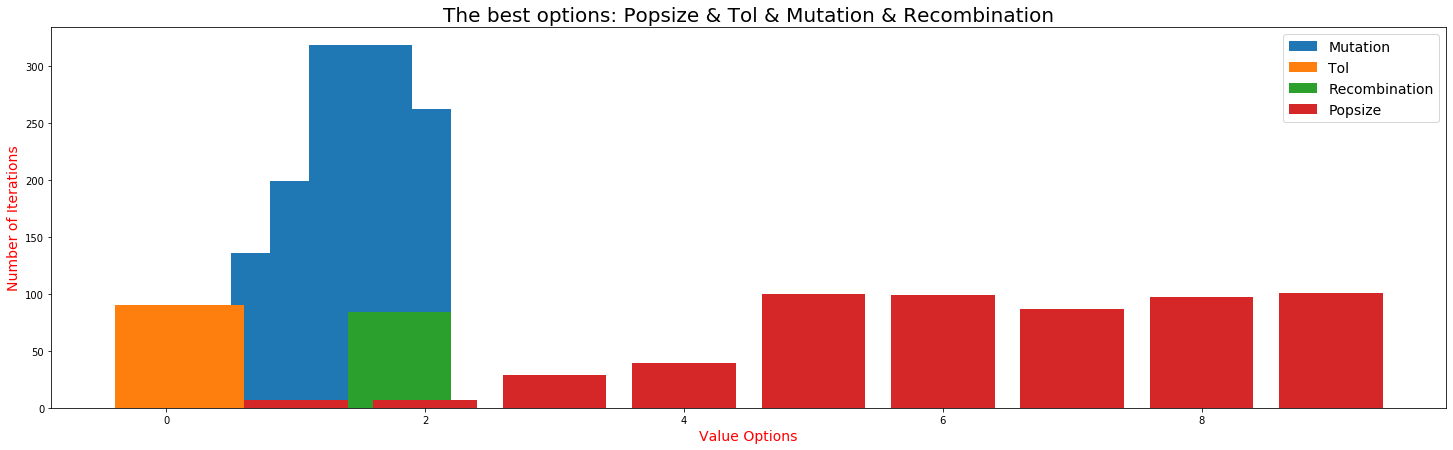

In [25]:
plt.figure(figsize=(25,7))

mut_ = list(mutation_data.keys())
counts = list(mutation_data.values())
plt.bar(mut_, counts)

tol_ = list(tol_data.keys())
counts = list(tol_data.values())
plt.bar(tol_, counts)

rec_ = list(recombination_data.keys())
counts = list(recombination_data.values())
plt.bar(rec_, counts)

popsize_ = list(popsize_data.keys())
counts = list(popsize_data.values())
plt.bar(popsize_, counts)

plt.title("The best options: Popsize & Tol & Mutation & Recombination", fontsize=20)
plt.xlabel("Value Options", color="red", fontsize=14)
plt.ylabel("Number of Iterations", color="red", fontsize=14)
plt.legend(['Mutation', 'Tol', 'Recombination', 'Popsize'], fontsize=14)

plt.show()

In [26]:
popsize_data

{1: 7, 2: 7, 3: 29, 4: 39, 5: 100, 6: 99, 7: 87, 8: 97, 9: 101}